In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [6]:
df=pd.read_csv('delhi.csv',)
df.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2009-01-01 00:00:00,22,9,0.0,8.7,4,1,31,10:11 AM,09:57 PM,...,14,19,0,50,0.0,1016,10,10,331,12
1,2009-01-01 01:00:00,22,9,0.0,8.7,4,1,31,10:11 AM,09:57 PM,...,13,21,0,51,0.0,1016,10,10,329,13
2,2009-01-01 02:00:00,22,9,0.0,8.7,4,1,31,10:11 AM,09:57 PM,...,12,22,0,52,0.0,1016,9,10,327,13
3,2009-01-01 03:00:00,22,9,0.0,8.7,4,1,31,10:11 AM,09:57 PM,...,11,23,0,54,0.0,1016,9,10,326,13
4,2009-01-01 04:00:00,22,9,0.0,8.7,4,1,31,10:11 AM,09:57 PM,...,11,21,2,52,0.0,1016,9,10,318,13


In [8]:
df.columns

Index(['date_time', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour',
       'uvIndex', 'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset',
       'sunrise', 'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
       'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM',
       'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph'],
      dtype='object')

In [10]:
df.shape

(96432, 25)

In [11]:
df.describe()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
count,96432.000000,96432.000000,96432.0,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000
mean,32.681434,21.505475,0.0,11.213489,6.736685,4.390316,46.094077,12.170929,30.486270,30.608543,29.072569,11.983501,14.485119,41.323254,0.032072,1006.972333,26.672484,9.913307,214.948689,8.795151
std,7.479931,8.245626,0.0,2.155831,1.656212,3.372834,31.249725,8.049545,9.853813,9.708888,8.581811,6.182597,20.518663,21.351832,0.287923,7.789316,8.917470,0.992465,101.676151,4.329033
min,12.000000,1.000000,0.0,3.800000,3.000000,1.000000,0.000000,-22.000000,4.000000,5.000000,4.000000,0.000000,0.000000,2.000000,0.000000,987.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,14.000000,0.0,8.700000,5.000000,1.000000,18.000000,6.000000,23.000000,24.000000,23.000000,7.000000,0.000000,24.000000,0.000000,1000.000000,20.000000,10.000000,116.000000,6.000000
50%,34.000000,23.000000,0.0,11.600000,7.000000,5.000000,46.000000,11.000000,31.000000,31.000000,30.000000,11.000000,5.000000,38.000000,0.000000,1007.000000,28.000000,10.000000,259.000000,8.000000
75%,38.000000,28.000000,0.0,13.200000,8.000000,8.000000,73.000000,20.000000,38.000000,38.000000,35.000000,16.000000,21.000000,56.000000,0.000000,1014.000000,33.000000,10.000000,303.000000,11.000000
max,52.000000,43.000000,0.0,14.000000,11.000000,11.000000,100.000000,30.000000,65.000000,65.000000,54.000000,72.000000,100.000000,100.000000,17.600000,1025.000000,51.000000,20.000000,360.000000,44.000000


In [12]:
df.isnull().sum()

date_time            0
maxtempC             0
mintempC             0
totalSnow_cm         0
sunHour              0
uvIndex              0
uvIndex.1            0
moon_illumination    0
moonrise             0
moonset              0
sunrise              0
sunset               0
DewPointC            0
FeelsLikeC           0
HeatIndexC           0
WindChillC           0
WindGustKmph         0
cloudcover           0
humidity             0
precipMM             0
pressure             0
tempC                0
visibility           0
winddirDegree        0
windspeedKmph        0
dtype: int64

In [14]:
data=df.loc[:,['maxtempC','mintempC','cloudcover','humidity','tempC', 'sunHour','HeatIndexC', 'precipMM', 'pressure','windspeedKmph']]
data.head()

,maxtempC,mintempC,cloudcover,humidity,tempC,sunHour,HeatIndexC,precipMM,pressure,windspeedKmph
0,22,9,0,50,10,8.7,14,0.0,1016,12
1,22,9,0,51,10,8.7,14,0.0,1016,13
2,22,9,0,52,9,8.7,13,0.0,1016,13
3,22,9,0,54,9,8.7,13,0.0,1016,13
4,22,9,2,52,9,8.7,13,0.0,1016,13


In [15]:
data.shape

(96432, 10)

In [16]:
data.columns

Index(['maxtempC', 'mintempC', 'cloudcover', 'humidity', 'tempC', 'sunHour',
       'HeatIndexC', 'precipMM', 'pressure', 'windspeedKmph'],
      dtype='object')

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

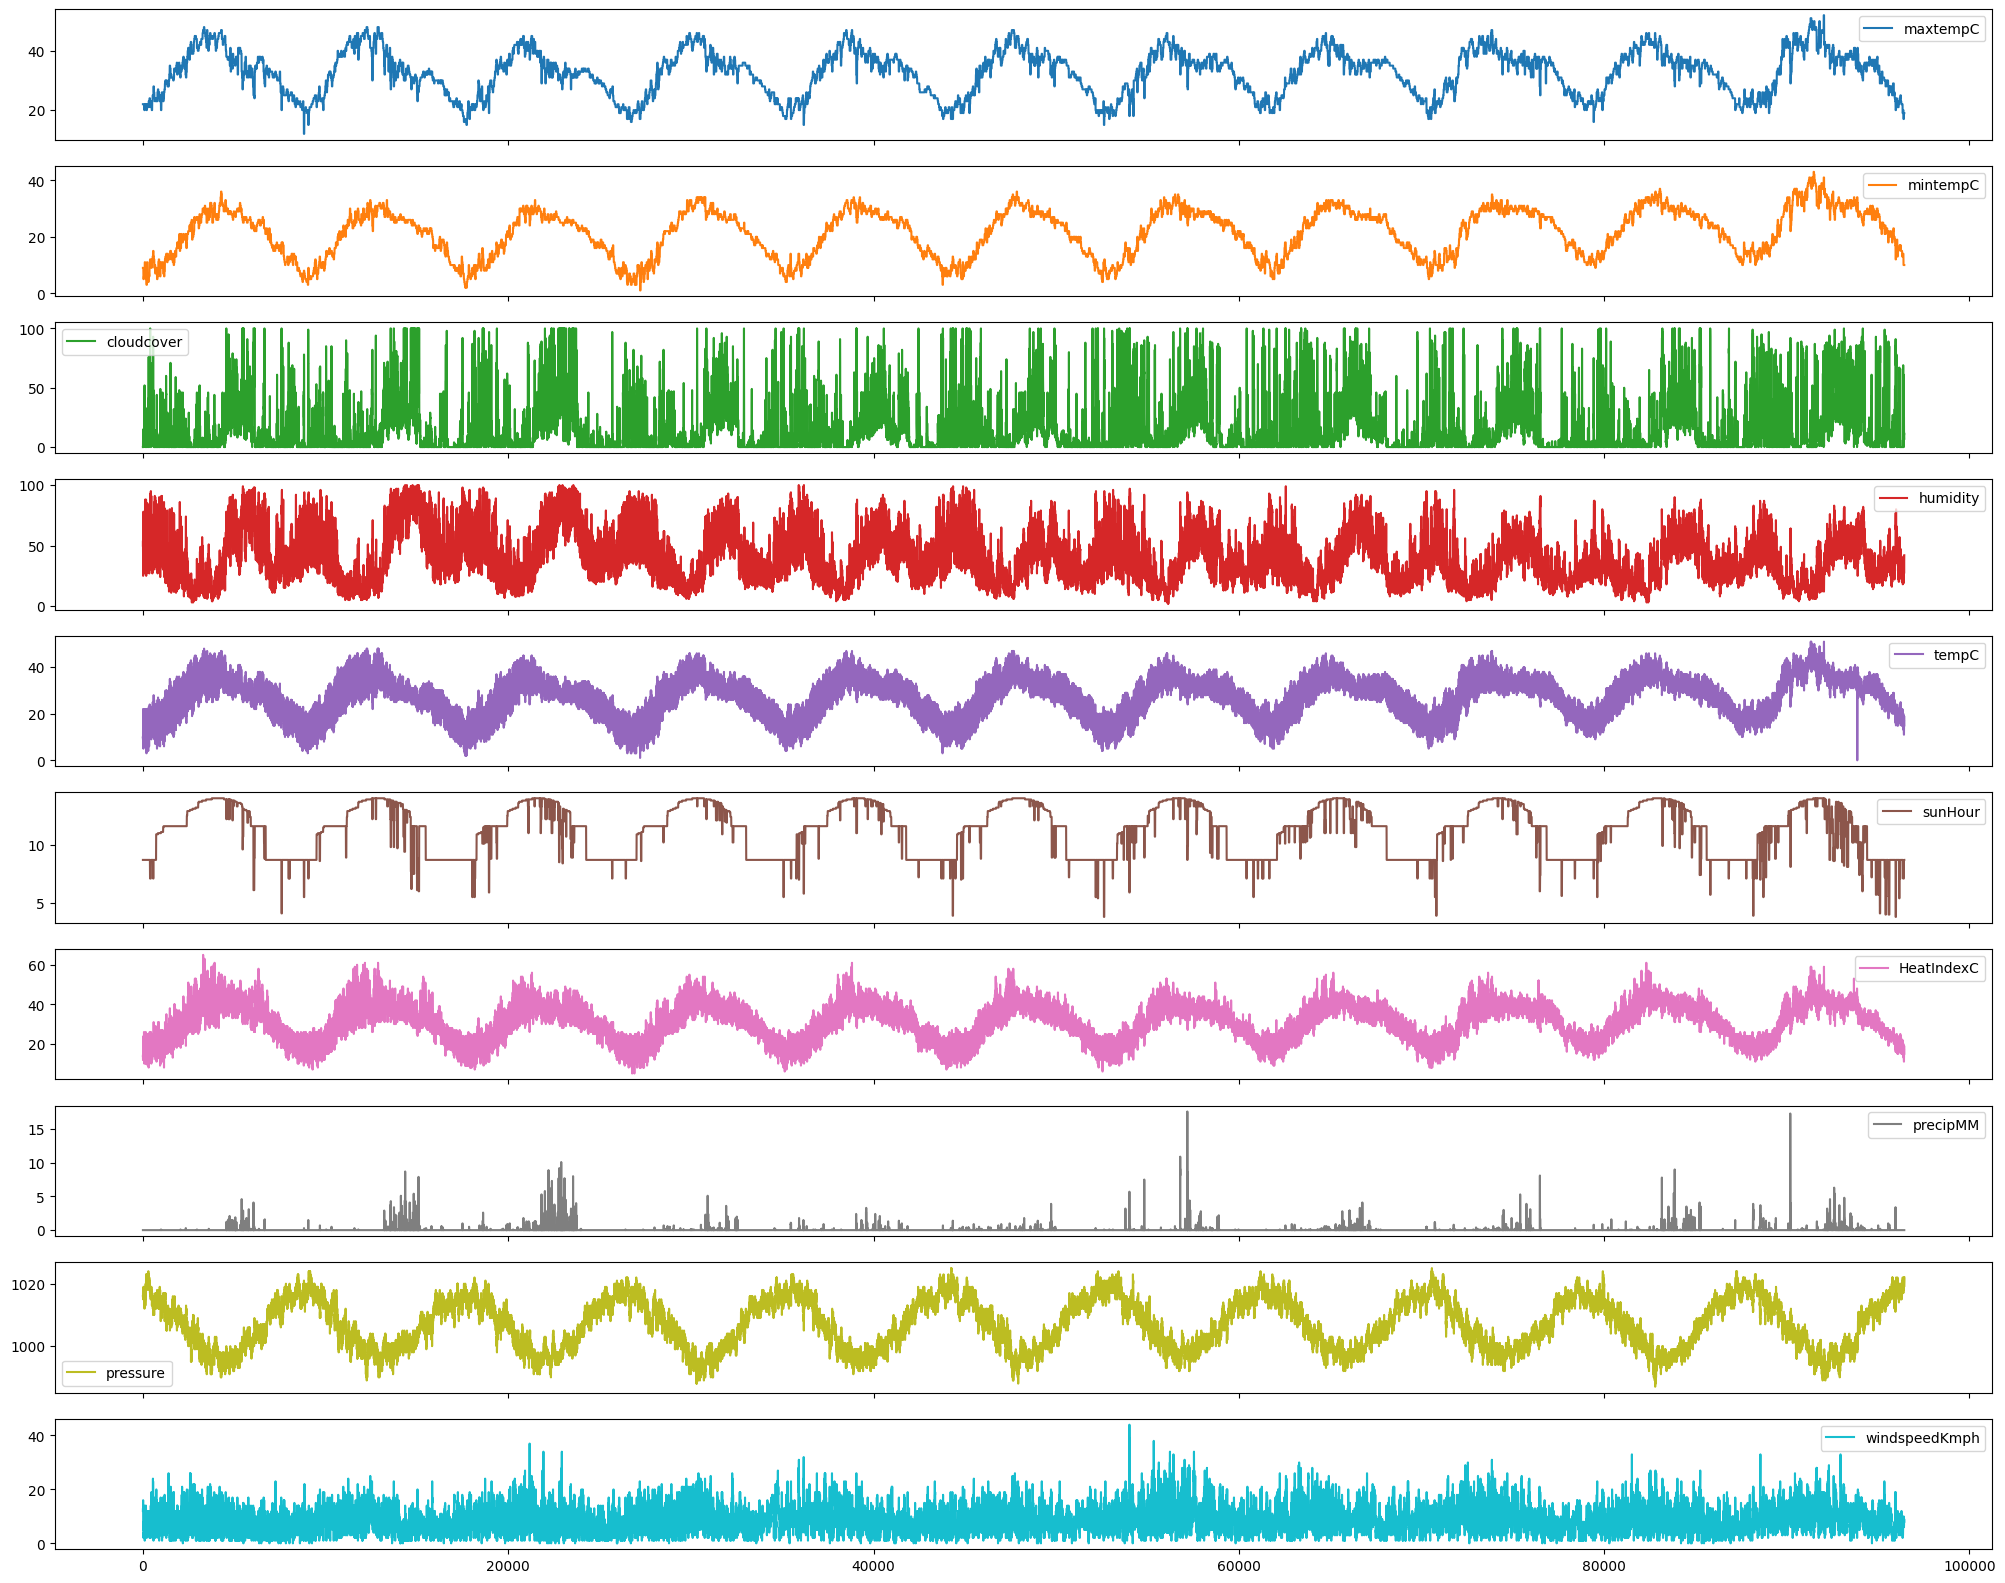

In [17]:
data.plot(subplots=True,figsize=(25,20))

array([[<Axes: title={'center': 'maxtempC'}>,
        <Axes: title={'center': 'mintempC'}>,
        <Axes: title={'center': 'cloudcover'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'tempC'}>,
        <Axes: title={'center': 'sunHour'}>],
       [<Axes: title={'center': 'HeatIndexC'}>,
        <Axes: title={'center': 'precipMM'}>,
        <Axes: title={'center': 'pressure'}>],
       [<Axes: title={'center': 'windspeedKmph'}>, <Axes: >, <Axes: >]],
      dtype=object)

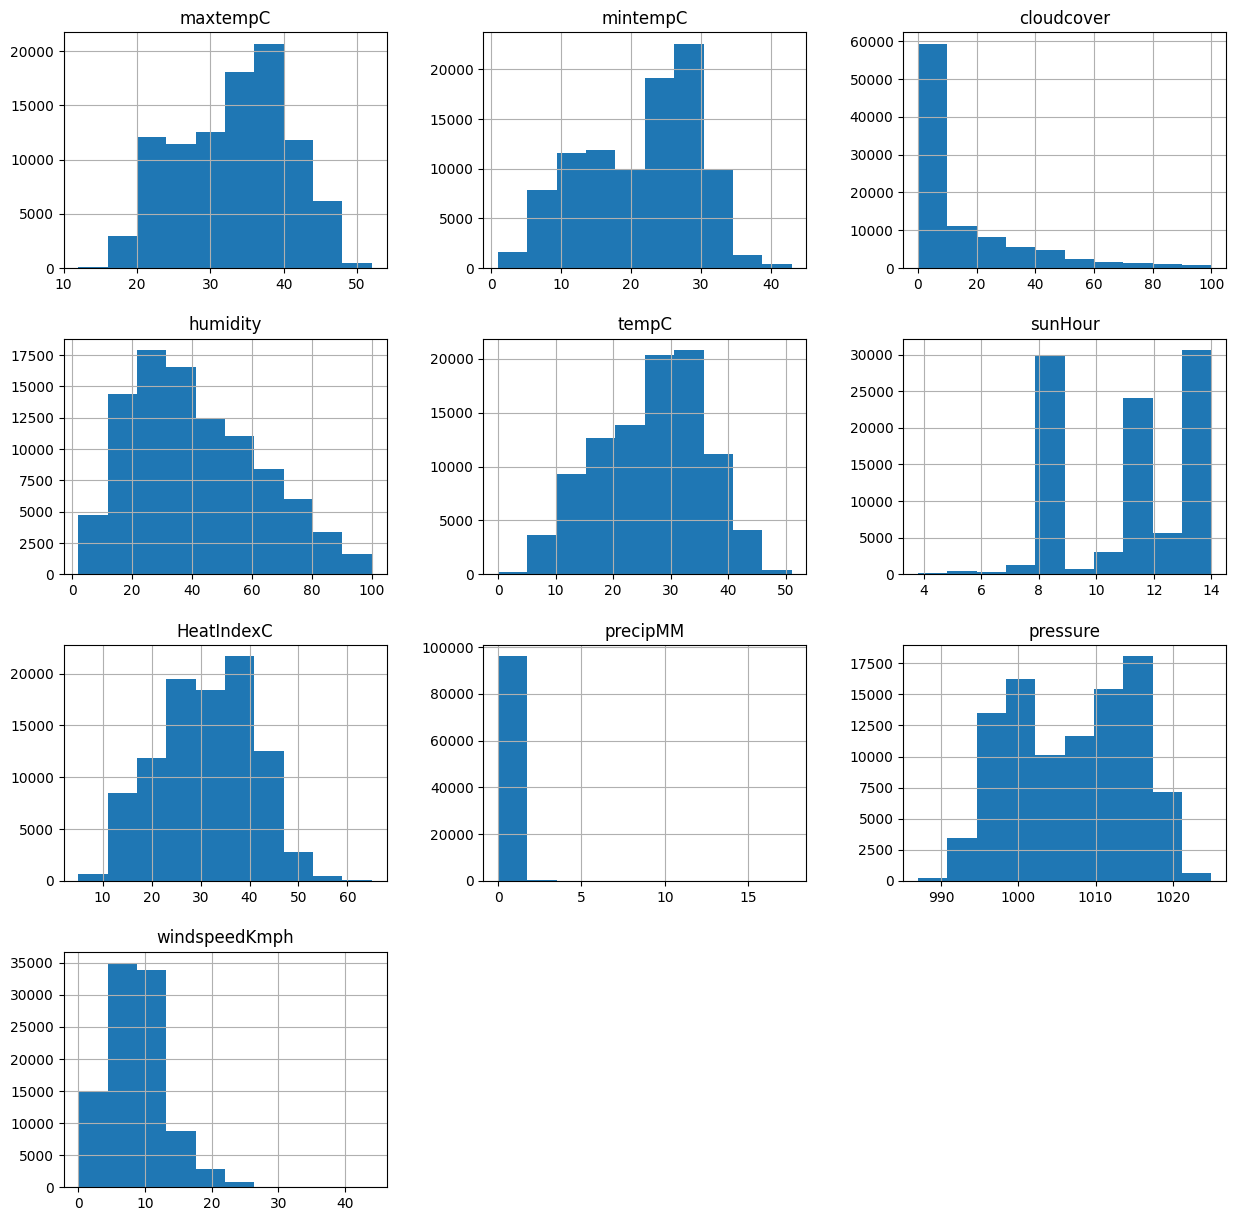

In [20]:
data.hist(bins=10,figsize=(15,15)) # Bins here refer to the total number of subplots to be drawn.

In [31]:
# Performing EDA

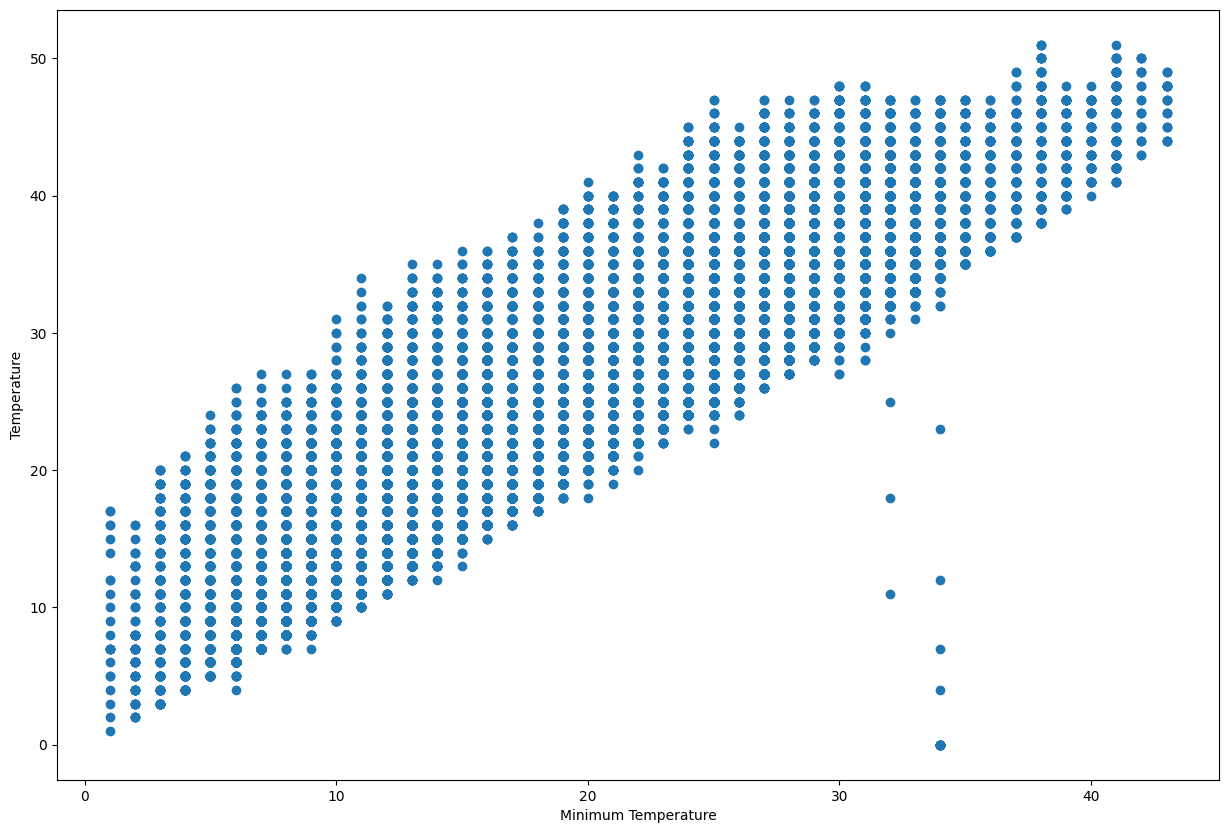

In [44]:
# Plotting Minimum Temperature vs Temperature
plt.figure(figsize=(15,10))
plt.scatter(data.mintempC,data.tempC)
plt.xlabel("Minimum Temperature")
plt.ylabel("Temperature")
plt.show()

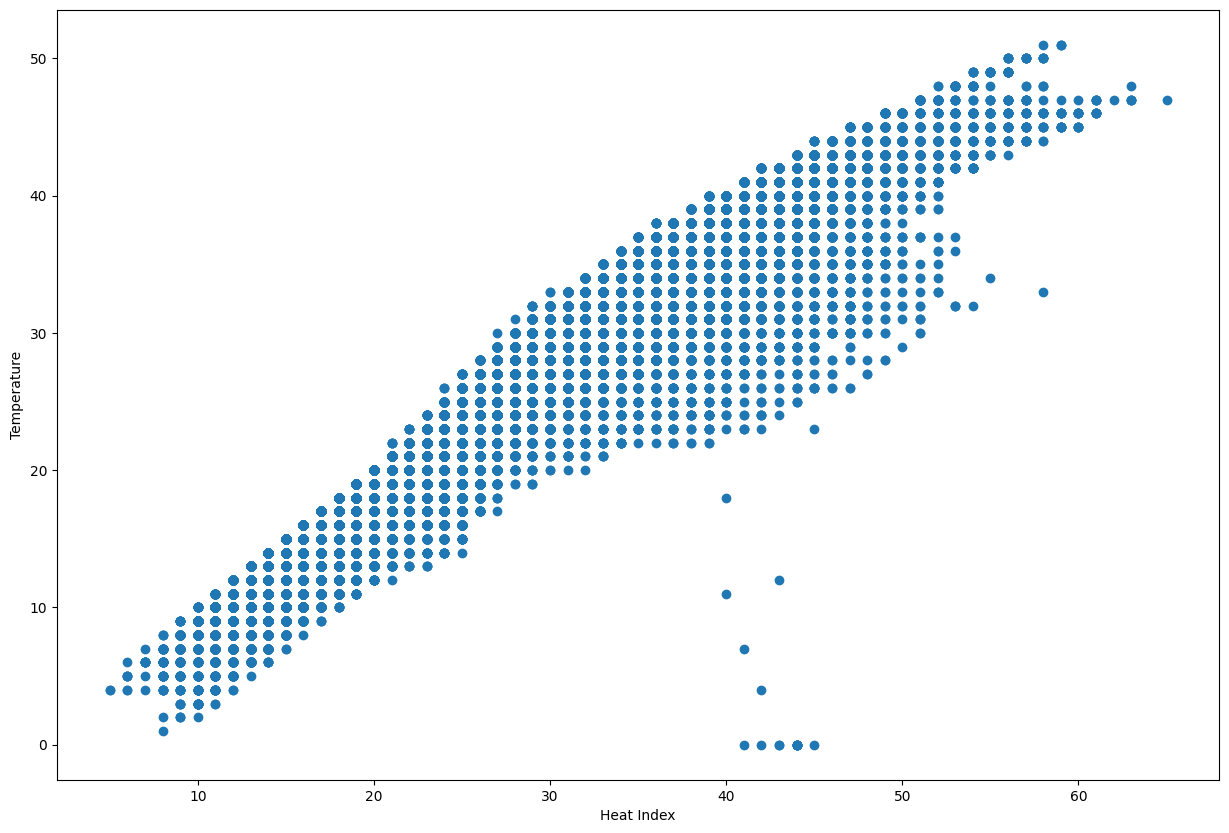

In [45]:
# Plotting Heat Index vs Temperature
plt.figure(figsize=(15,10))
plt.scatter(data.HeatIndexC,data.tempC)
plt.xlabel("Heat Index")
plt.ylabel("Temperature")
plt.show()

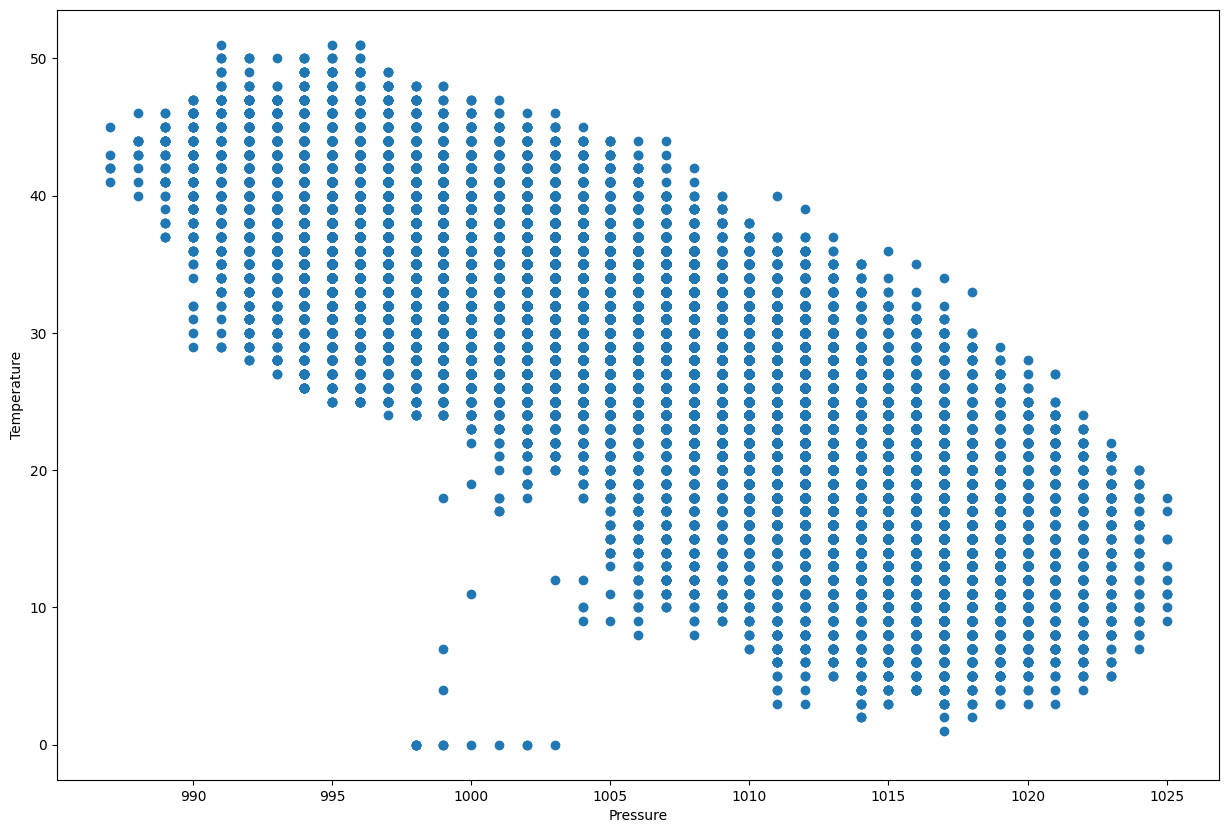

In [46]:
# Plotting Minimum Temperature vs Temperature
plt.figure(figsize=(15,10))
plt.scatter(data.pressure,data.tempC)
plt.xlabel("Pressure")
plt.ylabel("Temperature")
plt.show()

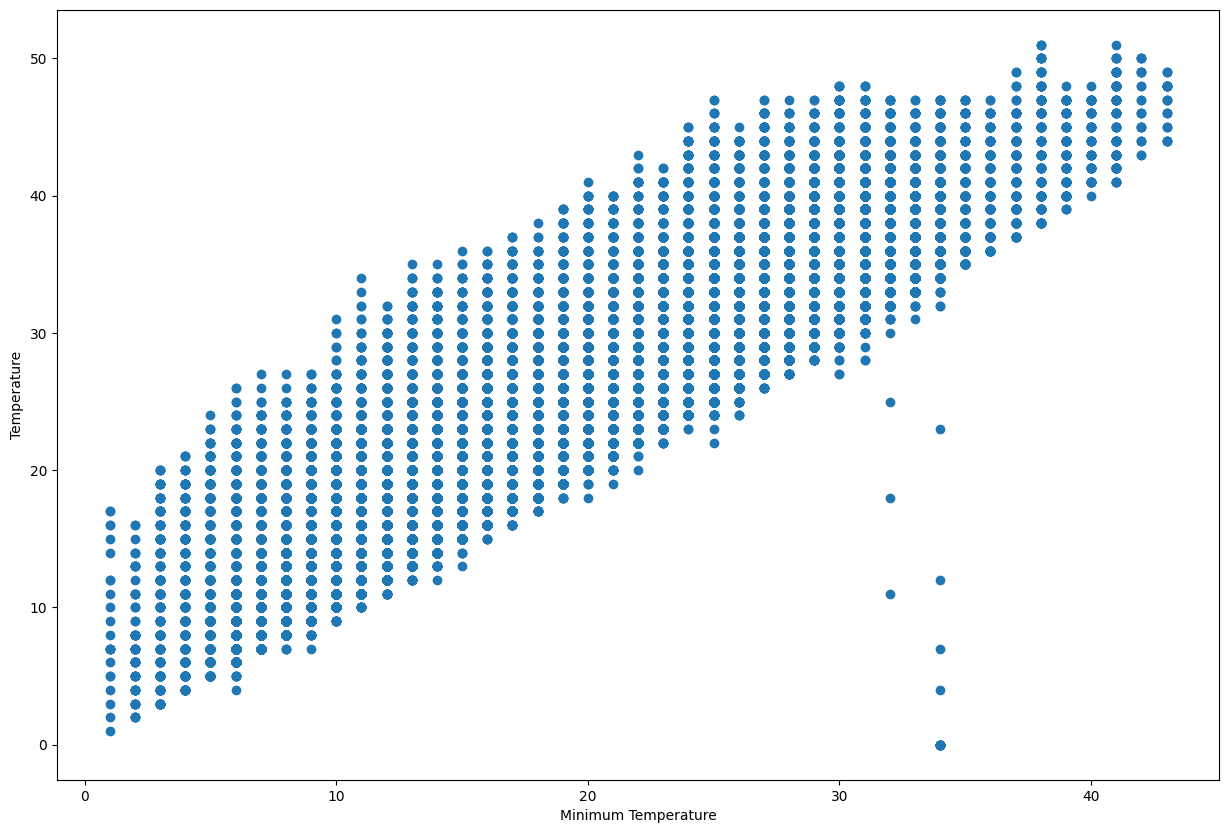

In [47]:
# Plotting Minimum Temperature vs Temperature
plt.figure(figsize=(15,10))
plt.scatter(data.mintempC,data.tempC)
plt.xlabel("Minimum Temperature")
plt.ylabel("Temperature")
plt.show()

In [48]:
# Model Prediction

In [53]:
x=data.drop(['tempC'],axis=1)
y=data['tempC']

In [55]:
from sklearn import preprocessing

label_encoder=preprocessing.LabelEncoder()
for i in x:
    data[i]=label_encoder.fit_transform(data[i])

In [59]:
# Splitting the dataset into training data and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [60]:
# Model- 1 Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [65]:
predict=lr.predict(x_test)

In [67]:
# Calculating Error
np.mean(np.absolute(predict-y_test))

1.3054863844171125

In [70]:
print(f'Variance score : {lr.score(x_test,y_test)}')

Variance score : 0.9625662522473828


In [76]:
for i in range(len(predict)):
    predict[i]=round(predict[i],2)
dff=pd.DataFrame({'Actual':y_test,'Prediction':predict,'Difference':(y_test-predict)})
dff.reset_index(drop=True) # Resetting the index value

,Actual,Prediction,Difference
0,28,25.79,2.21
1,31,26.68,4.32
2,31,30.94,0.06
3,23,24.07,-1.07
4,42,38.54,3.46
...,...,...,...
28925,23,21.09,1.91
28926,23,20.51,2.49
28927,32,34.64,-2.64
28928,21,22.12,-1.12


In [77]:
# Decision Tree Regression

In [78]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [80]:
predict_dtr=dtr.predict(x_test)
np.mean(np.absolute(predict_dtr-y_test))

0.6510629104735569

In [82]:
print(f'Variance Score : {dtr.score(x_test,y_test)}')

Variance Score : 0.9840164512566075


In [83]:
for i in range(len(predict_dtr)):
    predict_dtr[i]=round(predict_dtr[i],2)
dff_dtr=pd.DataFrame({'Actual':y_test,'Prediction':predict_dtr,'Difference':(y_test-predict_dtr)})
dff_dtr.reset_index(drop=True)

,Actual,Prediction,Difference
0,28,27.0,1.0
1,31,30.0,1.0
2,31,30.0,1.0
3,23,22.0,1.0
4,42,37.0,5.0
...,...,...,...
28925,23,23.0,0.0
28926,23,23.0,0.0
28927,32,32.0,0.0
28928,21,22.0,-1.0


In [84]:
# Random Forest Regression

In [87]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [88]:
predict_rfr=rfr.predict(x_test)
np.mean(np.absolute(y_test-predict_rfr))

0.5290630291233904

In [89]:
print(f'Variance Score : {rfr.score(x_test,y_test)}')

Variance Score : 0.9919595470468787


In [90]:
for i in range(len(predict_rfr)):
    predict_rfr[i]=round(predict_rfr[i],2)
dff_rfr=pd.DataFrame({'Actual':y_test,'Predicted':predict_rfr,'Difference':(y_test-predict_rfr)})
dff_rfr.reset_index(drop=True)

,Actual,Predicted,Difference
0,28,28.20,-0.20
1,31,30.48,0.52
2,31,29.38,1.62
3,23,21.92,1.08
4,42,38.85,3.15
...,...,...,...
28925,23,22.46,0.54
28926,23,22.65,0.35
28927,32,32.13,-0.13
28928,21,21.78,-0.78


In [92]:
# Calculating R2 score for each Model 
# R2 score is a statistical measure used in machine learning to evaluate the quality of a regression model. It determines how well the data fits the regression model( The best fit )
from sklearn.metrics import r2_score

In [96]:
# Calculating R2 Score for the Linear Regresson Model
mean_abs_error=np.mean(np.absolute(predict-y_test))
residual=np.mean((predict-y_test)**2)
r2_score_lr=r2_score(y_test,predict)
print("Mean Absolute Error : ",mean_abs_error)
print("Residual Sum of Squares : ",residual)
print("R2 Score : ",r2_score_lr)

Mean Absolute Error :  1.3054752851711027
Residual Sum of Squares :  2.9642765710335293
R2 Score :  0.9625662824964328


In [97]:
# Calculating R2 Score for Decision Tree Regression
mean_abs_error_dtr=np.mean(np.absolute(predict_dtr-y_test))
residual_dtr=np.mean((predict_dtr-y_test)**2)
r2_score_dtr=r2_score(y_test,predict_dtr)
print("Mean Absolute Error : ",mean_abs_error_dtr)
print("Residual Sum of Squares : ",residual_dtr)
print("R2 Score : ",r2_score_dtr)

Mean Absolute Error :  0.6510625648116142
Residual Sum of Squares :  1.2656944279294848
R2 Score :  0.9840164551027599


In [98]:
# Calculating R2 Score for Random Forest Regression
mean_abs_error_rfr=np.mean(np.absolute(predict_rfr-y_test))
residual_rfr=np.mean((predict_rfr-y_test)**2)
r2_score_rfr=r2_score(y_test,predict_rfr)
print("Mean Absolute Error : ",mean_abs_error_rfr)
print("Residual Sum of Squares : ",residual_rfr)
print("R2 Score : ",r2_score_rfr)

Mean Absolute Error :  0.5290608365019012
Residual Sum of Squares :  0.6367069858278603
R2 Score :  0.9919594852676928


In [ ]:
# Thus from the R2 Score, we can decide that Random Forest Algorithm would be the best approach for 